In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import erf
from tqdm import tqdm

In [2]:
def reading_csv(file_path):
    df = pd.read_csv(file_path)
    mean_used = df['S2_val'].tolist()
    result    = df['Decision (S1>S2)'].tolist()
    data_tuple = (result, mean_used)
    return data_tuple

def data_var2(file_path):
    df = pd.read_csv(file_path)
    var2 = df['S2_std'].to_numpy()
    var2 = pd.unique(var2)     # valeurs uniques de S2_std
    return list(var2)

def psycometrique(data_tuple, var2, block_size=1500, big_blocs=11):
    """
    Reconstruit les moyennes par bloc comme dans ton code :
    - true_array_result[j][k] = P(1) pour le j-ième var2, k-ième S2_val
    - true_array_mean_used[j][k] = S2_val moyenne correspondante
    """
    result, mean_used = data_tuple
    true_array_mean_used = []
    true_array_result    = []

    size_one_block = block_size * big_blocs  # nb essais par courbe (11 x 200)

    for j in range(len(var2)):
        array_mean_result = []
        array_mean_used   = []
        for i in range(0, size_one_block, block_size):
            # bloc de result
            block_r = result[size_one_block*j + i : size_one_block*j + i + block_size]
            mean_r  = sum(block_r) / len(block_r)
            array_mean_result.append(mean_r)

            # bloc de mean_used
            block_m = mean_used[size_one_block*j + i : size_one_block*j + i + block_size]
            mean_m  = sum(block_m) / len(block_m)
            array_mean_used.append(mean_m)

        true_array_result.append(array_mean_result)
        true_array_mean_used.append(array_mean_used)

    return true_array_result, true_array_mean_used

def build_targets_from_csv(file_path, block_size=1500, big_blocs=11):
    """
    Construit :
      - target[(mu2, std2)] = P_empirique(réponse=1)
      - mus_test : liste ordonnée des S2_val utilisés
      - vars_test : liste ordonnée des S2_std utilisés
    à partir de ton CSV.
    """
    data_tuple = reading_csv(file_path)
    var2_list  = data_var2(file_path)           # S2_std uniques
    array_mean_result, array_mean_used = psycometrique(
        data_tuple, var2_list,
        block_size=block_size,
        big_blocs=big_blocs
    )

    target = {}
    # on suppose que les S2_val sont les mêmes pour chaque var2
    mus_test = array_mean_used[0]
    vars_test = var2_list

    for j, std2 in enumerate(var2_list):
        for k, mu2 in enumerate(array_mean_used[j]):
            p_emp = array_mean_result[j][k]
            target[(mu2, std2)] = p_emp

    return target, mus_test, vars_test

In [3]:
target, mus_test, vars_test = build_targets_from_csv('C:\\Users\\gabri\\Desktop\\bayesian\\experiment_results_1500.csv') # before experiment_results_test.csv 
print(target)

{(-10.0, np.int64(0)): 1.0, (-8.0, np.int64(0)): 1.0, (-6.0, np.int64(0)): 1.0, (-4.0, np.int64(0)): 1.0, (-2.0, np.int64(0)): 0.9993333333333333, (0.0, np.int64(0)): 0.4746666666666667, (2.0, np.int64(0)): 0.005333333333333333, (4.0, np.int64(0)): 0.0, (6.0, np.int64(0)): 0.0, (8.0, np.int64(0)): 0.0, (10.0, np.int64(0)): 0.0, (-10.0, np.int64(2)): 1.0, (-8.0, np.int64(2)): 0.9986666666666667, (-6.0, np.int64(2)): 0.9953333333333333, (-4.0, np.int64(2)): 0.9566666666666667, (-2.0, np.int64(2)): 0.8313333333333334, (0.0, np.int64(2)): 0.5873333333333334, (2.0, np.int64(2)): 0.346, (4.0, np.int64(2)): 0.11333333333333333, (6.0, np.int64(2)): 0.04133333333333333, (8.0, np.int64(2)): 0.008, (10.0, np.int64(2)): 0.0, (-10.0, np.int64(4)): 0.9526666666666667, (-8.0, np.int64(4)): 0.9266666666666666, (-6.0, np.int64(4)): 0.8886666666666667, (-4.0, np.int64(4)): 0.8313333333333334, (-2.0, np.int64(4)): 0.73, (0.0, np.int64(4)): 0.642, (2.0, np.int64(4)): 0.536, (4.0, np.int64(4)): 0.454, (6.0

std0=2.00, mu0=0.716, MSE=0.00148
std0=2.03, mu0=0.738, MSE=0.00157
std0=2.06, mu0=0.760, MSE=0.00142
std0=2.09, mu0=0.783, MSE=0.00100
std0=2.12, mu0=0.805, MSE=0.00112
std0=2.15, mu0=0.829, MSE=0.00109
std0=2.18, mu0=0.852, MSE=0.00094
std0=2.21, mu0=0.876, MSE=0.00093
std0=2.24, mu0=0.900, MSE=0.00083
std0=2.27, mu0=0.925, MSE=0.00077
std0=2.30, mu0=0.949, MSE=0.00062
std0=2.33, mu0=0.975, MSE=0.00059
std0=2.36, mu0=1.000, MSE=0.00053
std0=2.39, mu0=1.026, MSE=0.00054
std0=2.42, mu0=1.052, MSE=0.00055
std0=2.45, mu0=1.078, MSE=0.00049
std0=2.48, mu0=1.105, MSE=0.00044
std0=2.52, mu0=1.132, MSE=0.00035
std0=2.55, mu0=1.160, MSE=0.00040
std0=2.58, mu0=1.188, MSE=0.00033
std0=2.61, mu0=1.216, MSE=0.00036
std0=2.64, mu0=1.244, MSE=0.00034
std0=2.67, mu0=1.273, MSE=0.00025
std0=2.70, mu0=1.302, MSE=0.00023
std0=2.73, mu0=1.331, MSE=0.00029
std0=2.76, mu0=1.361, MSE=0.00034
std0=2.79, mu0=1.391, MSE=0.00026
std0=2.82, mu0=1.422, MSE=0.00030
std0=2.85, mu0=1.452, MSE=0.00036
std0=2.88, mu0

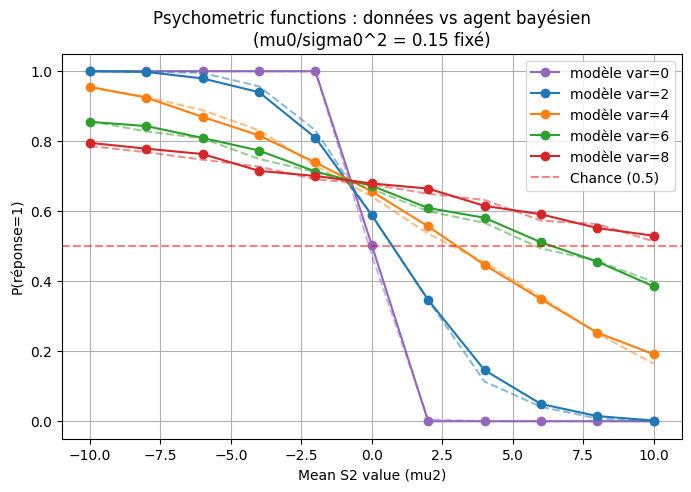

In [ ]:
mus_test  = [-10,-8,-6,-4,-2,0,2,4,6,8,10]
vars_test = [0,2,4,6,8]

def sample_dobs(mu1, std1, mu2, std2):
    A = np.random.normal(mu1, std1)
    B = np.random.normal(mu2, std2)
    return A - B

def posterior_params(dobs, std1, std2, mu0, std0):
    var_lik = std1**2 + std2**2      # v
    var0    = std0**2               # sigma0^2

    sigma_post2 = 1.0 / (1.0/var0 + 1.0/var_lik)
    mu_post     = sigma_post2 * (mu0/var0 + dobs/var_lik)
    return mu_post, np.sqrt(sigma_post2)

def Phi(z):
    # CDF normale standard avec scipy.special.erf
    return 0.5 * (1.0 + erf(z / np.sqrt(2.0)))

def prob_response_1(mu1, std1, mu2, std2, mu0, std0):
    """
    Tire un dobs, calcule le posterior, renvoie P(répondre 1) = P(x>0|dobs).
    """
    dobs = sample_dobs(mu1, std1, mu2, std2)
    mu_post, sigma_post = posterior_params(dobs, std1, std2, mu0, std0)
    return Phi(mu_post / sigma_post)

def agent_response(mu1, std1, mu2, std2, mu0, std0):
    """
    Agent stochastique : tire une Bernoulli avec proba = P(répondre 1).
    """
    p1 = prob_response_1(mu1, std1, mu2, std2, mu0, std0)
    return 1 if np.random.rand() < p1 else 0

mu1  = 0.0
std1 = 0.2
relation = 0.179 # before 0.15

def simulate_for_std0(std0, n_trials=2000):
    """
    Fixe std0, déduit mu0 = relation * std0**2, 
    puis calcule P_modèle(1) pour chaque (mu2, std2).
    """
    var0 = std0**2
    mu0  = relation * var0
    results = {}
    for mu2 in mus_test:
        for std2 in vars_test:
            count = 0
            for _ in range(n_trials):
                count += agent_response(mu1, std1, mu2, std2, mu0, std0)
            results[(mu2, std2)] = count / n_trials
    return mu0, results

def mse_for_std0(std0, n_trials=2000):
    mu0, sim = simulate_for_std0(std0, n_trials=n_trials)
    err = 0.0
    for key, target_val in target.items():
        err += (sim[key] - target_val)**2
    return mu0, err / len(target), sim

# ========= 4) Grid search sur std0 (mu0 déduit du ratio) =========

std0_grid = np.linspace(2, 5.0, 100)   # à ajuster si besoin

best_std0 = None
best_mu0  = None
best_mse  = np.inf
best_sim  = None

mse_array = []
for std0 in std0_grid:
    mu0, mse, sim = mse_for_std0(std0, n_trials=1500)
    mse_array.append(mse)
    print(f"std0={std0:.2f}, mu0={mu0:.3f}, MSE={mse:.5f}")
    if mse < best_mse:
        best_mse = mse
        best_std0 = std0
        best_mu0  = mu0
        best_sim  = sim

print(f"\nBEST PARAMETERS (avec mu0/sigma0^2 = {relation} fixé) :")
print(f"std0={best_std0:.3f}, mu0={best_mu0:.3f}, MSE={best_mse:.6f}")

# ========= 5) Plot psychométriques : données vs meilleur agent =========

plt.figure(figsize=(8,5))
colors = {
    0: "tab:purple",
    2: "tab:blue",
    4: "tab:orange",
    6: "tab:green",
    8: "tab:red"
}


for std2 in vars_test:
    xs = mus_test
    ys_model  = [best_sim[(mu2, std2)]   for mu2 in mus_test]
    ys_target = [target[(mu2, std2)]     for mu2 in mus_test]

    plt.plot(xs, ys_model,  "-o", label=f"modèle var={std2}",  color=colors[std2])
    plt.plot(xs, ys_target, "--",  alpha=0.5, color=colors[std2])

plt.axhline(0.5, linestyle="--", color="red", alpha=0.5, label="Chance (0.5)")
plt.xlabel("Mean S2 value (mu2)")
plt.ylabel("P(réponse=1)")
plt.title(f"Psychometric functions : données vs agent bayésien\n(mu0/sigma0^2 = {relation} fixé)")
plt.legend()
plt.grid(True)
plt.show()


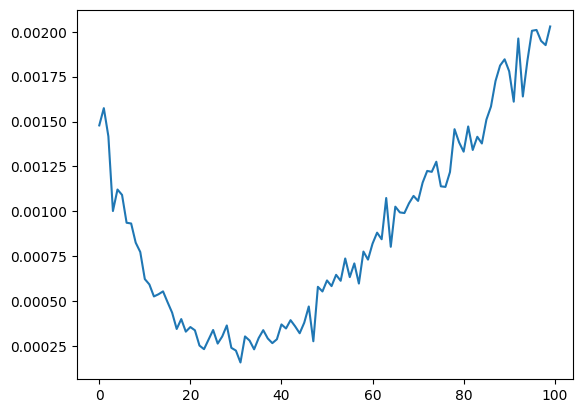

In [5]:
plt.plot(mse_array)

get off the relation with numpy

Grid search sur (mu0, std0) ...


100%|██████████| 110/110 [03:15<00:00,  1.78s/it]



BEST PARAMETERS :
mu0=1.569, std0=3.020, MSE=0.000138


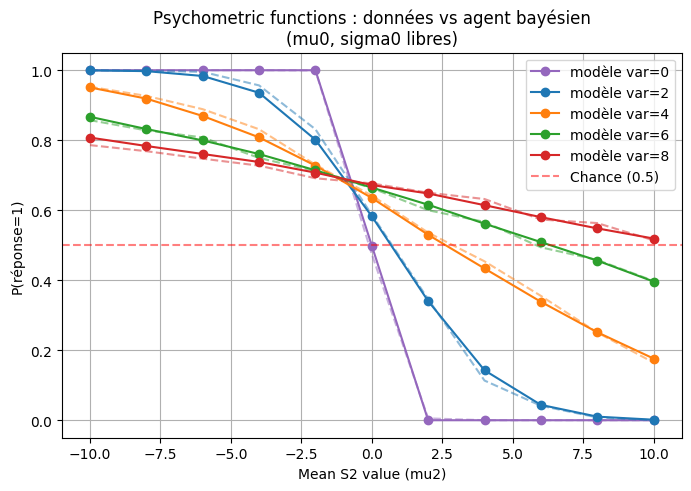

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

mus_test  = [-10,-8,-6,-4,-2,0,2,4,6,8,10]
vars_test = [0,2,4,6,8]   # attention : il faut que ça colle aux std dans target

mu1  = 0.0
std1 = 0.2

def sample_dobs(mu1, std1, mu2, std2, n_trials):
    A = np.random.normal(mu1, std1, size=n_trials)
    B = np.random.normal(mu2, std2, size=n_trials)
    return A - B  # vecteur

def posterior_params(dobs, std1, std2, mu0, std0):
    var_lik = std1**2 + std2**2      # v
    var0    = std0**2               # sigma0^2

    sigma_post2 = 1.0 / (1.0/var0 + 1.0/var_lik)
    mu_post     = sigma_post2 * (mu0/var0 + dobs/var_lik)
    return mu_post, np.sqrt(sigma_post2)

def Phi(z):
    # CDF normale standard avec scipy.special.erf
    return 0.5 * (1.0 + erf(z / np.sqrt(2.0)))

def simulate_for_params(mu0, std0, n_trials=2000):
    """
    Calcule P_modèle(1) pour chaque (mu2, std2) via
    E[ Phi(mu_post / sigma_post) ].
    """
    results = {}
    for mu2 in mus_test:
        for std2 in vars_test:
            dobs = sample_dobs(mu1, std1, mu2, std2, n_trials)
            mu_post, sigma_post = posterior_params(dobs, std1, std2, mu0, std0)
            probs = Phi(mu_post / sigma_post)   # vecteur
            results[(mu2, std2)] = probs.mean() # P_modèle(1)
    return results

def mse_for_params(mu0, std0, target, n_trials=2000):
    sim = simulate_for_params(mu0, std0, n_trials=n_trials)
    err = 0.0
    for key, target_val in target.items():
        err += (sim[key] - target_val)**2
    return err / len(target), sim

from tqdm import tqdm

# ex : recherche sur [-5,5] pour mu0, [0.5,6] pour std0
mu0_grid  = np.linspace(-3, 3, 110)     # pas de 0.25
std0_grid = np.linspace(0.1, 5.0, 100)  # pas de ~0.19

best_mu0  = None
best_std0 = None
best_mse  = np.inf
best_sim  = None

print("Grid search sur (mu0, std0) ...")

for mu0 in tqdm(mu0_grid):
    for std0 in std0_grid:
        mse, sim = mse_for_params(mu0, std0, target, n_trials=2000)
        if mse < best_mse:
            best_mse  = mse
            best_mu0  = mu0
            best_std0 = std0
            best_sim  = sim

print("\nBEST PARAMETERS :")
print(f"mu0={best_mu0:.3f}, std0={best_std0:.3f}, MSE={best_mse:.6f}")

plt.figure(figsize=(8,5))
colors = {
    0: "tab:purple",
    2: "tab:blue",
    4: "tab:orange",
    6: "tab:green",
    8: "tab:red"
}

for std2 in vars_test:
    xs = mus_test
    ys_model  = [best_sim[(mu2, std2)]   for mu2 in mus_test]
    ys_target = [target[(mu2, std2)]     for mu2 in mus_test]

    plt.plot(xs, ys_model,  "-o", label=f"modèle var={std2}",  color=colors[std2])
    plt.plot(xs, ys_target, "--",  alpha=0.5, color=colors[std2])

plt.axhline(0.5, linestyle="--", color="red", alpha=0.5, label="Chance (0.5)")
plt.xlabel("Mean S2 value (mu2)")
plt.ylabel("P(réponse=1)")
plt.title("Psychometric functions : données vs agent bayésien\n(mu0, sigma0 libres)")
plt.legend()
plt.grid(True)
plt.show()
